In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from keras.models import Model,Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from keras.utils import np_utils
from keras.optimizers import Adam


Using TensorFlow backend.


In [3]:
X_train = np.load("./X_train.npy")
Y_train = np.load("./Y_train.npy")
X_test  = np.load("./X_test.npy")
Y_train = np_utils.to_categorical(Y_train)

In [4]:
print(X_train.shape,Y_train.shape,X_test.shape)

(1252, 227, 227, 3) (1252, 10) (313, 227, 227, 3)


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


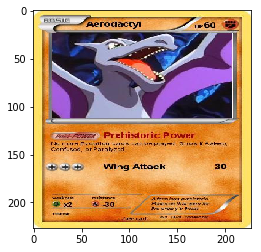

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


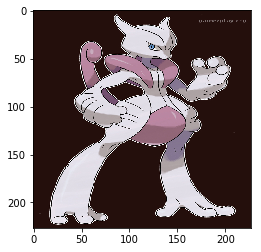

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


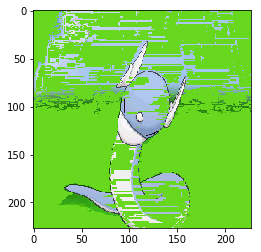

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


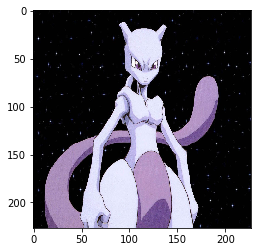

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


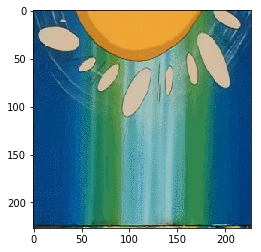

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


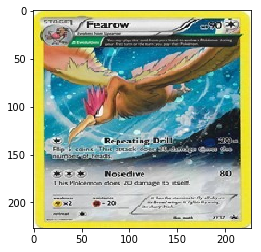

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


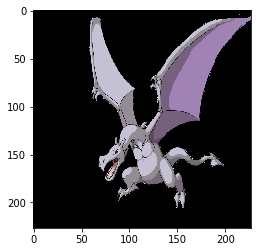

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


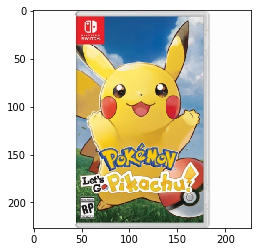

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


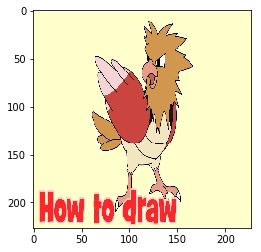

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


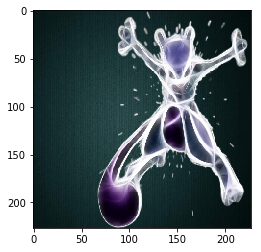

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


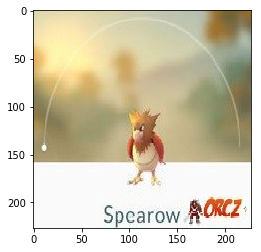

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


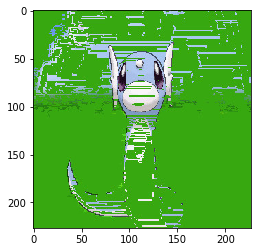

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


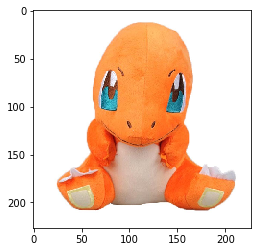

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


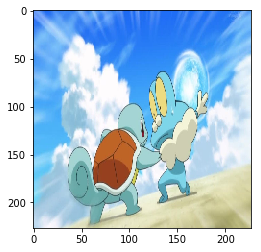

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


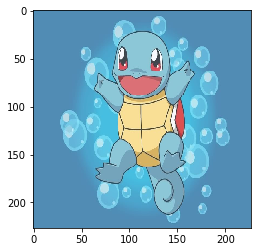

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


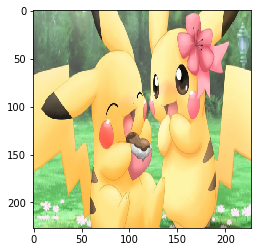

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


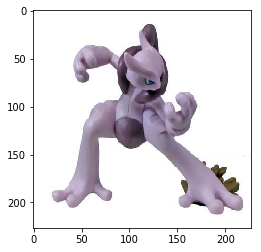

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


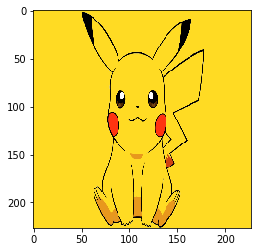

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


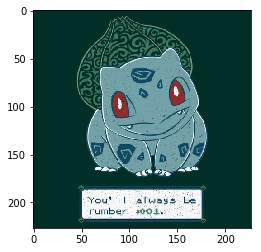

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


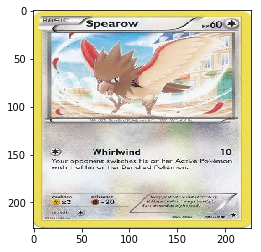

In [5]:
for ix in range(500,520):
    plt.imshow(X_train[ix])
    print (Y_train[ix])
    plt.show()

In [14]:
#ALEXNET cnn
model = Sequential()
model.add(Convolution2D(96,(11,11),activation='relu',strides=4, input_shape=(227, 227, 3)))
model.add(MaxPooling2D(pool_size=(3,3),strides=2))
model.add(Convolution2D(256,(5,5),activation='relu',strides=1,padding="same"))
model.add(MaxPooling2D(pool_size=(3,3),strides=2))
model.add(Convolution2D(384,(3,3),activation='relu',strides=1,padding="same"))
model.add(Convolution2D(384,(3,3),activation='relu',strides=1,padding="same"))
model.add(Convolution2D(256,(3,3),activation='relu',strides=1,padding="same"))
model.add(MaxPooling2D(pool_size=(3,3),strides=2))
model.add(Flatten())

In [15]:
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(10,activation="softmax"))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 256)       884992    
__________

In [17]:
adam = Adam(lr = 0.00003)
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [18]:
hist =  model.fit(X_train,Y_train,
                  epochs=30, 
                  shuffle=True,  
                  batch_size=32,
                  validation_split=0.20)

Train on 1001 samples, validate on 251 samples
Epoch 1/30
1001/1001 [==============================] - 89s 89ms/step - loss: 2.6737 - acc: 0.0979 - val_loss: 2.2870 - val_acc: 0.1554
Epoch 2/30
1001/1001 [==============================] - 71s 71ms/step - loss: 2.2951 - acc: 0.1179 - val_loss: 2.2785 - val_acc: 0.1275
Epoch 3/30
1001/1001 [==============================] - 68s 68ms/step - loss: 2.2869 - acc: 0.1149 - val_loss: 2.2666 - val_acc: 0.1275
Epoch 4/30
1001/1001 [==============================] - 67s 67ms/step - loss: 2.2643 - acc: 0.1409 - val_loss: 2.1123 - val_acc: 0.2430
Epoch 5/30
1001/1001 [==============================] - 68s 68ms/step - loss: 2.1334 - acc: 0.2128 - val_loss: 1.8741 - val_acc: 0.3347
Epoch 6/30
1001/1001 [==============================] - 68s 68ms/step - loss: 1.9670 - acc: 0.2358 - val_loss: 1.8418 - val_acc: 0.3546
Epoch 7/30
1001/1001 [==============================] - 68s 68ms/step - loss: 1.9085 - acc: 0.2887 - val_loss: 1.5873 - val_acc: 0.4223
E

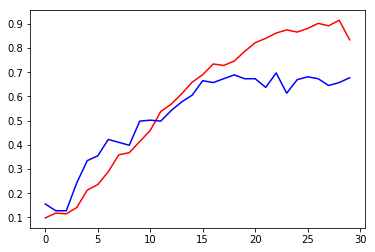

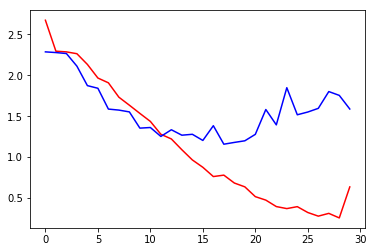

In [19]:

plt.figure(1)
plt.plot(hist.history['acc'], color = 'r')
plt.plot(hist.history['val_acc'], color = 'b')

plt.figure(2)
plt.plot(hist.history['loss'], color = 'r')
plt.plot(hist.history['val_loss'], color = 'b')


##### y=model.predict(X_test)